## Importing Library

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
import category_encoders as ce
from sklearn.preprocessing import normalize,scale
import imblearn
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
%matplotlib inline

## Reading training data

In [173]:
path = r"C:\Users\eakhumb\Downloads\file\train.csv"

In [174]:
df = pd.read_csv(path)
df = df.drop(columns=["ID"])

In [175]:
data=df
data[data["Claim"]==0].shape, data[data["Claim"]==1].shape

((43590, 10), (8720, 10))

## Train Test Split

In [284]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=["Claim"]), data["Claim"], test_size=0.3, random_state=6)

## Data Pre-Processing

In [75]:
unique_destinations_count = X_train["Destination"].value_counts()
unique_destinations = list(unique_destinations_count.index)
rare_destination = list(unique_destinations_count[unique_destinations_count<2].index)
X_train["Destination"] = X_train["Destination"].apply(lambda x: "Others" if x in rare_destination else x)
X_test["Destination"] = X_test["Destination"].apply(lambda x: "Others" if ((x not in unique_destinations) | (x in rare_destination)) else x)

## Lable Encoding

In [76]:
le = LabelEncoder()
X_train.Agency = le.fit_transform(X_train.Agency)
X_test.Agency = le.transform(X_test.Agency)
le = LabelEncoder()
X_train["Agency Type"] = le.fit_transform(X_train["Agency Type"])
X_test["Agency Type"] = le.transform(X_test["Agency Type"])
le = LabelEncoder()
X_train["Distribution Channel"] = le.fit_transform(X_train["Distribution Channel"])
X_test["Distribution Channel"] = le.transform(X_test["Distribution Channel"])
le = LabelEncoder()
X_train["Product Name"] = le.fit_transform(X_train["Product Name"])
X_test["Product Name"] = le.transform(X_test["Product Name"])
le = LabelEncoder()
X_train["Destination"] = le.fit_transform(X_train["Destination"])
X_test["Destination"] = le.transform(X_test["Destination"])

# Making Prediction Using Logestic regression

In [77]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
lr.score(X_test, y_test)

0.8476390747467023

## Checking correlation

In [299]:
cor = data.corr()
cor = abs(cor)
cor[cor>=0.75]
# cor

,Duration,Net Sales,Commision (in value),Age,Claim
Duration,1.0,NaN,NaN,NaN,NaN
Net Sales,NaN,1.0,NaN,NaN,NaN
Commision (in value),NaN,NaN,1.0,NaN,NaN
Age,NaN,NaN,NaN,1.0,NaN
Claim,NaN,NaN,NaN,NaN,1.0


In [298]:
pd.crosstab(data["Agency"], data["Claim"])

Claim,0,1
Agency,,
ADM,56,0
ART,223,0
C2B,5438,5177
CBH,75,1
CCR,146,10
CSR,59,1
CWT,5965,848
EPX,24338,1880
JWT,519,31


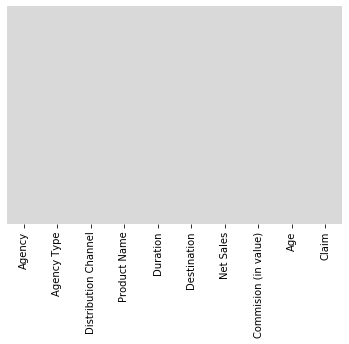

In [297]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='tab20c_r')

In [296]:
data["Agency"].value_counts()

EPX    26218
C2B    10615
CWT     6813
JZI     4615
LWC      806
SSI      771
JWT      550
RAB      527
TST      394
KML      313
ART      223
CCR      156
TTW      104
CBH       76
CSR       60
ADM       56
Name: Agency, dtype: int64

In [295]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


## chi**2 for categorical columns

In [294]:
csq = chi2_contingency(pd.crosstab(data['Claim'], data['Agency']))
print("Agency P-value : ",csq[0])
csq1 = chi2_contingency(pd.crosstab(data['Claim'], data['Agency Type']))
print("Agency Type P-value : ",csq1[0])
csq2 = chi2_contingency(pd.crosstab(data['Claim'], data['Distribution Channel']))
print("Distribution Channel P-value : ",csq2[0])
csq3 = chi2_contingency(pd.crosstab(data['Claim'], data['Product Name']))
print("Product Name P-value : ",csq3[0])
csq4 = chi2_contingency(pd.crosstab(data['Claim'], data['Destination']))
print("Destination P-value : ",csq4[0])

Agency P-value :  10852.787999889759
Agency Type P-value :  4322.140017164073
Distribution Channel P-value :  8.984836712505931
Product Name P-value :  12006.993058015907
Destination P-value :  7050.809768066112


## Trying to find outliers

Text(0.5, 1.0, 'Age')

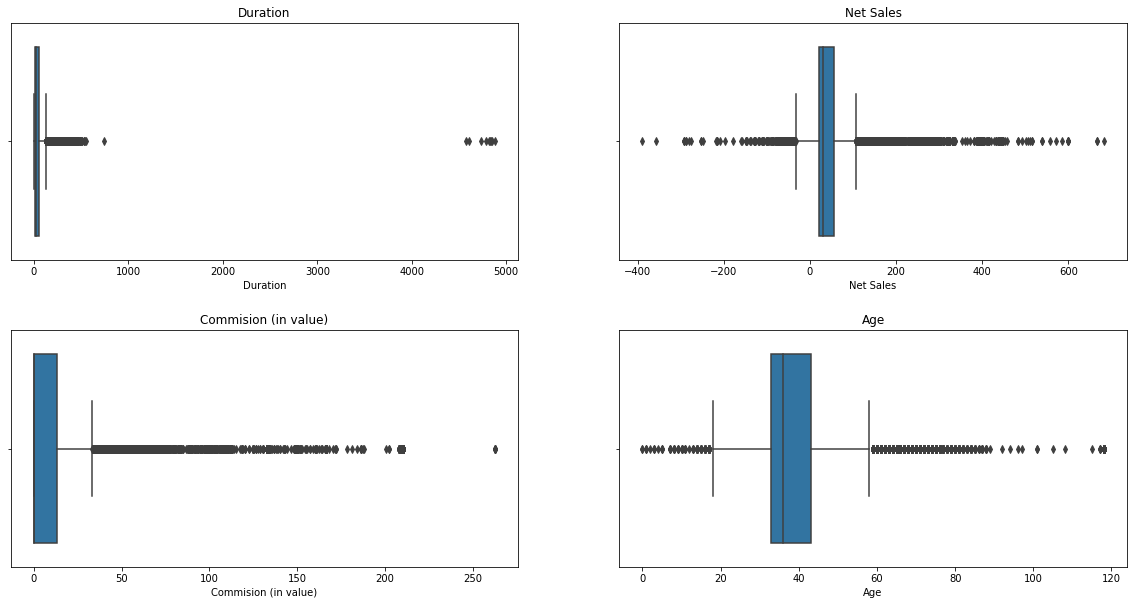

In [301]:
fig, ax = plt.subplots(2, 2, figsize=[20,10])
fig.subplots_adjust(hspace = .30)

sns.boxplot(data["Duration"], ax=ax[0][0])
ax[0][0].set_title("Duration")

sns.boxplot(data["Net Sales"], ax=ax[0][1])
ax[0][1].set_title("Net Sales")

sns.boxplot(data[r"Commision (in value)"], ax=ax[1][0])
ax[1][0].set_title(r"Commision (in value)")

sns.boxplot(data["Age"], ax=ax[1][1])
ax[1][1].set_title("Age")

## Removing Outliers

In [302]:
data = data[(data.Duration<1000) & (data.Duration>=0)]

In [303]:
print(data[data["Net Sales"]<0].shape)
print(data[data["Net Sales"]>=0].shape)

(503, 10)
(51794, 10)


## EDA

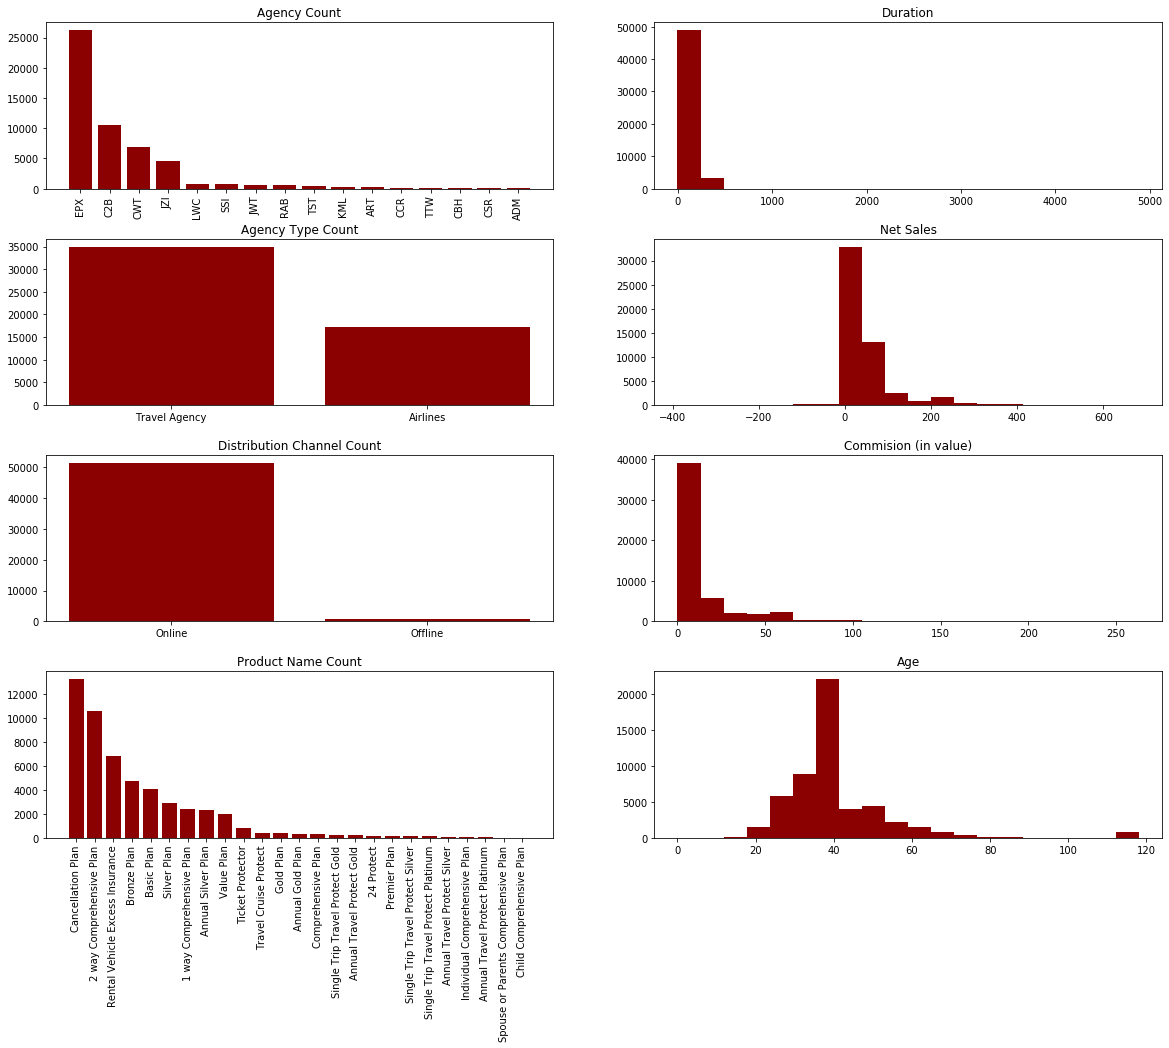

In [289]:
fig, ax = plt.subplots(4, 2, figsize=[20,15])
fig.subplots_adjust(hspace = .30)

ax[0][0].bar(list(data["Agency"].value_counts().index), data["Agency"].value_counts(), color ='darkred')
ax[0][0].tick_params(axis = 'x', labelrotation=90)
ax[0][0].set_title("Agency Count")

ax[1][0].bar(list(data["Agency Type"].value_counts().index), data["Agency Type"].value_counts(), color ='darkred')
ax[1][0].set_title("Agency Type Count")

ax[2][0].bar(list(data["Distribution Channel"].value_counts().index), data["Distribution Channel"].value_counts(), color ='darkred')
ax[2][0].set_title("Distribution Channel Count")

ax[3][0].bar(list(data["Product Name"].value_counts().index), data["Product Name"].value_counts(), color ='darkred')
ax[3][0].tick_params(axis = 'x', labelrotation=90)
ax[3][0].set_title("Product Name Count")

ax[0][1].hist(data["Duration"], bins=20, color ='darkred')
ax[0][1].set_title("Duration")

ax[1][1].hist(data["Net Sales"], bins=20, color ='darkred')
ax[1][1].set_title("Net Sales")

ax[2][1].hist(data[r"Commision (in value)"], bins=20, color ='darkred')
ax[2][1].set_title(r"Commision (in value)")

ax[3][1].hist(data["Age"], bins=20, color ='darkred')
ax[3][1].set_title("Age")

plt.show()

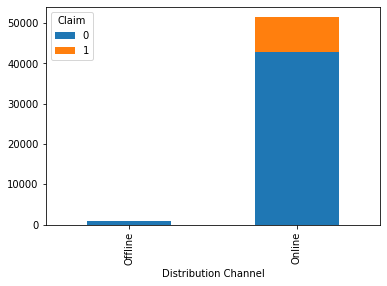

In [279]:
distribution = data.groupby("Distribution Channel")["Claim"].value_counts().unstack()
distribution.plot(kind="bar", stacked=True)

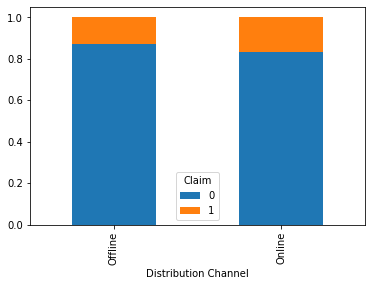

In [280]:
pd.crosstab(data["Distribution Channel"], data["Claim"], normalize="index").plot(kind="bar", stacked=True)

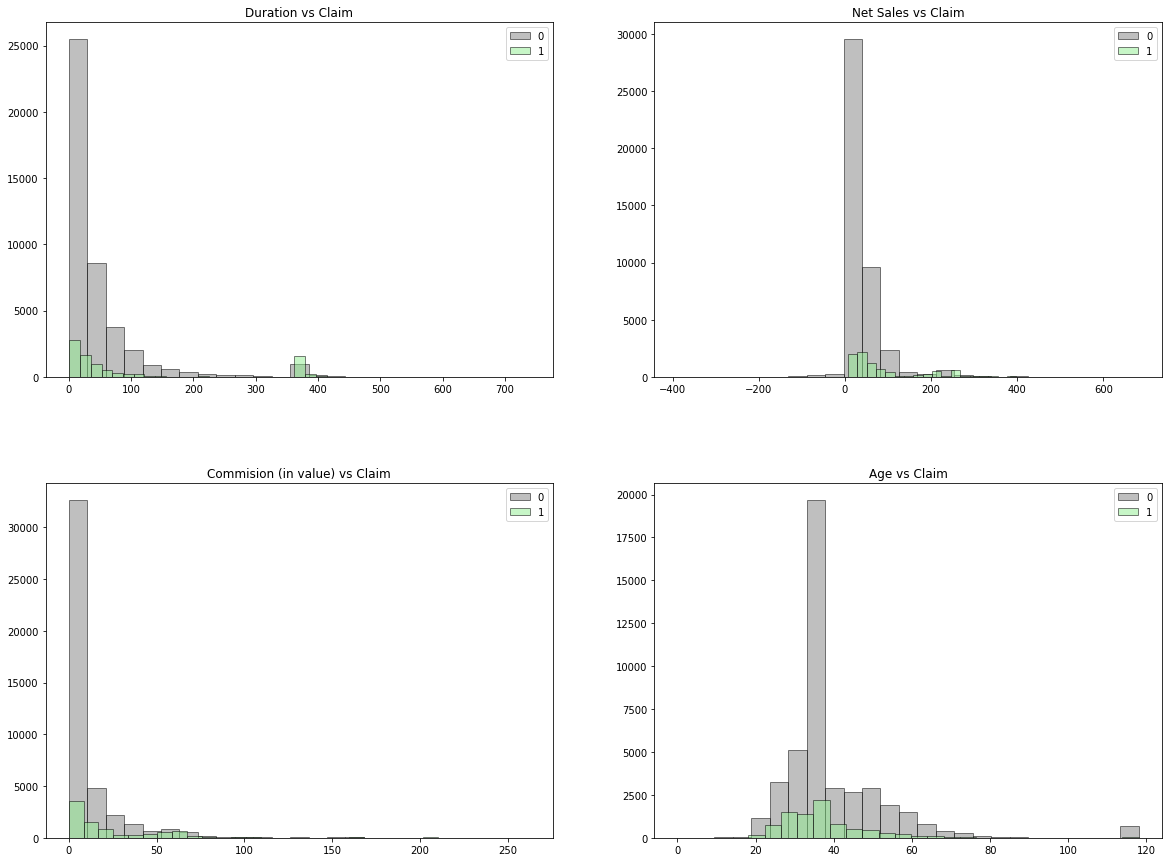

In [304]:
fig, ax = plt.subplots(2, 2, figsize=[20,15])
fig.subplots_adjust(hspace = .30)

ax[0][0].hist(data[data["Claim"]==0]["Duration"], bins = 25, label ='0', alpha = .50,edgecolor= 'black',color ='grey')
ax[0][0].hist(data[data["Claim"]==1]["Duration"], bins = 25, label ='1', alpha = .50,edgecolor= 'black',color ='lightgreen')
ax[0][0].legend()
ax[0][0].set_title("Duration vs Claim")

ax[0][1].hist(data[data["Claim"]==0]["Net Sales"], bins = 25, label ='0', alpha = .50,edgecolor= 'black',color ='grey')
ax[0][1].hist(data[data["Claim"]==1]["Net Sales"], bins = 25, label ='1', alpha = .50,edgecolor= 'black',color ='lightgreen')
ax[0][1].legend()
ax[0][1].set_title("Net Sales vs Claim")

ax[1][0].hist(data[data["Claim"]==0][r"Commision (in value)"], bins = 25, label ='0', alpha = .50,edgecolor= 'black',color ='grey')
ax[1][0].hist(data[data["Claim"]==1][r"Commision (in value)"], bins = 25, label ='1', alpha = .50,edgecolor= 'black',color ='lightgreen')
ax[1][0].legend()
ax[1][0].set_title(r"Commision (in value) vs Claim")

ax[1][1].hist(data[data["Claim"]==0]["Age"], bins = 25, label ='0', alpha = .50,edgecolor= 'black',color ='grey')
ax[1][1].hist(data[data["Claim"]==1]["Age"], bins = 25, label ='1', alpha = .50,edgecolor= 'black',color ='lightgreen')
ax[1][1].legend()
ax[1][1].set_title("Age vs Claim")

plt.show()

## Scatter plot for numeric data

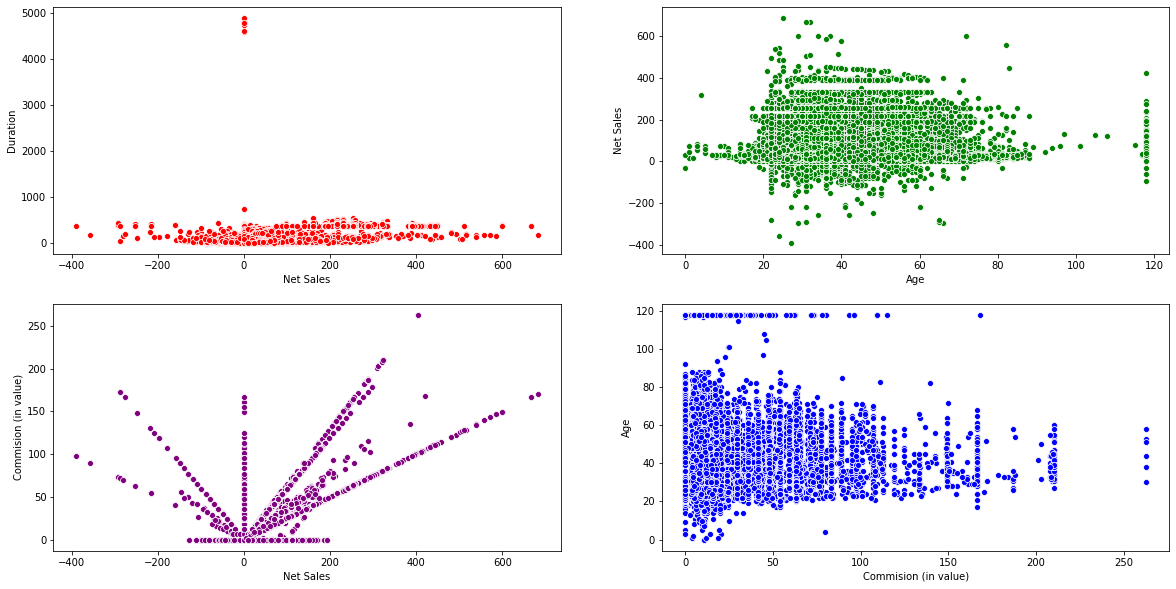

In [288]:
fig, ax = plt.subplots(2, 2, figsize=[20,10])

sns.scatterplot(data["Net Sales"], data["Duration"], ax=ax[0][0], color="red")

sns.scatterplot(data["Age"], data["Net Sales"], ax=ax[0][1], color="green")

sns.scatterplot(data["Net Sales"], data["Commision (in value)"], ax=ax[1][0], color="purple")

sns.scatterplot(data["Commision (in value)"], data["Age"], ax=ax[1][1], color="blue")

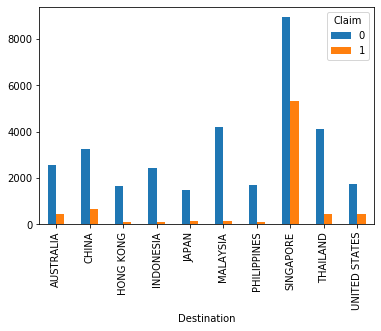

In [161]:
top_10_des = list(data["Destination"].value_counts().head(10).index)

data[data["Destination"].isin(top_10_des)].groupby(["Destination", "Claim"]).count()["Agency"].unstack().plot(kind="bar")

In [163]:
def ageGroup(x):
    if x>90:
        return "90+"
    if (x>70) & (x<=90):
        return "70-90"
    if (x>50) & (x<=70):
        return "50-70"
    if (x>30) & (x<=50):
        return "30-50"
    if (x>20) & (x<=30):
        return "20-30"
    if x<20:
        return "20-"

In [164]:
data["AgeGroup"] = data["Age"].apply(ageGroup)
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,AgeGroup
0,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0,30-50
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0,30-50
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0,30-50
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0,30-50
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0,30-50


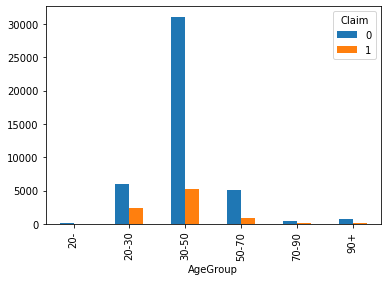

In [168]:
data.groupby(["AgeGroup", "Claim"])["Agency"].count().unstack().plot(kind="bar")

In [182]:
def durationGroup(x):
    if (x<=10):
        return "10-"
    if (x>10) & (x<=20):
        return "10-20"
    if (x>20) & (x<=60):
        return "20-60"
    if (x>60) & (x<=100):
        return "60-100"
    if (x>100):
        return "100+"

In [183]:
data["durationGroup"] = data["Duration"].apply(durationGroup)
data[data["Duration"]>1000]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,durationGroup
382,SSI,Airlines,Online,Ticket Protector,4736,SINGAPORE,0.32,0.09,48,0,100+
7766,SSI,Airlines,Online,Ticket Protector,4831,SINGAPORE,0.32,0.09,48,0,100+
14544,SSI,Airlines,Online,Ticket Protector,4847,SINGAPORE,0.32,0.09,48,0,100+
22123,SSI,Airlines,Online,Ticket Protector,4844,SINGAPORE,0.32,0.09,48,0,100+
31985,SSI,Airlines,Online,Ticket Protector,4815,SINGAPORE,0.32,0.09,48,0,100+
33701,SSI,Airlines,Online,Ticket Protector,4580,SINGAPORE,0.32,0.09,48,0,100+
43158,SSI,Airlines,Online,Ticket Protector,4609,SINGAPORE,0.32,0.09,48,0,100+
47791,SSI,Airlines,Online,Ticket Protector,4881,SINGAPORE,0.13,0.04,48,0,100+
48880,SSI,Airlines,Online,Ticket Protector,4784,SINGAPORE,0.32,0.09,48,0,100+


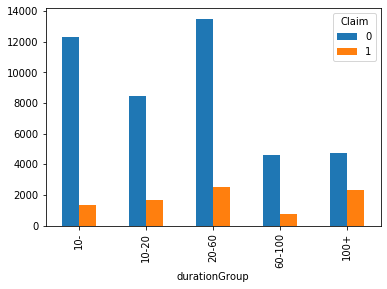

In [188]:
data.groupby(["durationGroup", "Claim"])["Agency"].count().unstack().loc[["10-", "10-20", "20-60", "60-100", "100+"]].plot(kind="bar")

## One Hot Coding

In [5]:
newdata = data.join(pd.get_dummies(data["Agency"])).join(pd.get_dummies(data["Agency Type"])).join(pd.get_dummies(data["Distribution Channel"])).join(pd.get_dummies(data["Product Name"])).join(pd.get_dummies(data["Destination"])).drop(columns=["Agency", "Agency Type", "Distribution Channel", "Product Name", "Destination"])
newdata.shape

(52310, 147)

## Making prediction

In [7]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred = lr.predict(X_test)

In [9]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

cr = classification_report(y_test, y_pred)
print()
print("Classification report")
print(cr)

accuracy = accuracy_score(y_test, y_pred)
print()
print("Accuracy score : ", round(accuracy*100,2), "%")

precision = precision_score(y_test, y_pred)
print()
print("Presion score : ", round(precision*100,2), "%")

Confusion Matrix
[[12574   560]
 [ 1737   822]]

Classification report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     13134
           1       0.59      0.32      0.42      2559

    accuracy                           0.85     15693
   macro avg       0.74      0.64      0.67     15693
weighted avg       0.83      0.85      0.83     15693


Accuracy score :  85.36 %

Presion score :  59.48 %


## Label encoding

In [14]:
le = LabelEncoder()
newdata2=data
newdata2["Agency"] = le.fit_transform(newdata2["Agency"])
newdata2["Agency Type"] = le.fit_transform(newdata2["Agency Type"])
newdata2["Distribution Channel"] = le.fit_transform(newdata2["Distribution Channel"])
newdata2["Product Name"] = le.fit_transform(newdata2["Product Name"])
newdata2["Destination"] = le.fit_transform(newdata2["Destination"])

## Spliting data then Making prediction

In [15]:
X_train, X_test, y_train, y_test = train_test_split(newdata2.drop(columns=["Claim"]), newdata2["Claim"], test_size=0.3, random_state=6)

In [16]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [17]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

cr = classification_report(y_test, y_pred)
print()
print("Classification report")
print(cr)

accuracy = accuracy_score(y_test, y_pred)
print()
print("Accuracy score : ", round(accuracy*100,2), "%")

precision = precision_score(y_test, y_pred)
print()
print("Presion score : ", round(precision*100,2), "%")

Confusion Matrix
[[12728   406]
 [ 1993   566]]

Classification report
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     13134
           1       0.58      0.22      0.32      2559

    accuracy                           0.85     15693
   macro avg       0.72      0.60      0.62     15693
weighted avg       0.82      0.85      0.82     15693


Accuracy score :  84.71 %


## Label Encoder then Random Forest Prediction

In [10]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [11]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

cr = classification_report(y_test, y_pred)
print()
print("Classification report")
print(cr)

accuracy = accuracy_score(y_test, y_pred)
print()
print("Accuracy score : ", round(accuracy*100,2), "%")

precision = precision_score(y_test, y_pred)
print()
print("Presion score : ", round(precision*100,2), "%")

Confusion Matrix
[[12670   464]
 [  541  2018]]

Classification report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     13134
           1       0.81      0.79      0.80      2559

    accuracy                           0.94     15693
   macro avg       0.89      0.88      0.88     15693
weighted avg       0.94      0.94      0.94     15693


Accuracy score :  93.6 %

Presion score :  81.31 %


## Making prediction using DecisionTreeClassifier

In [25]:
newdata = data.join(pd.get_dummies(data["Agency"])).join(pd.get_dummies(data["Agency Type"])).join(pd.get_dummies(data["Distribution Channel"])).join(pd.get_dummies(data["Product Name"])).join(pd.get_dummies(data["Destination"])).drop(columns=["Agency", "Agency Type", "Distribution Channel", "Product Name", "Destination"])
newdata.shape

(52310, 147)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(newdata.drop(columns=["Claim"]), newdata["Claim"], test_size=0.3, random_state=6)

In [12]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

cr = classification_report(y_test, y_pred)
print()
print("Classification report")
print(cr)

accuracy = accuracy_score(y_test, y_pred)
print()
print("Accuracy score : ", round(accuracy*100,2), "%")

precision = precision_score(y_test, y_pred)
print()
print("Presion score : ", round(precision*100,2), "%")

Confusion Matrix
[[12352   782]
 [ 1502  1057]]

Classification report
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     13134
           1       0.57      0.41      0.48      2559

    accuracy                           0.85     15693
   macro avg       0.73      0.68      0.70     15693
weighted avg       0.84      0.85      0.84     15693


Accuracy score :  85.45 %

Presion score :  57.48 %


## Making prediction using RandomForestClassifier

In [14]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [15]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

cr = classification_report(y_test, y_pred)
print()
print("Classification report")
print(cr)

accuracy = accuracy_score(y_test, y_pred)
print()
print("Accuracy score : ", round(accuracy*100,2), "%")

precision = precision_score(y_test, y_pred)
print()
print("Presion score : ", round(precision*100,2), "%")

Confusion Matrix
[[12666   468]
 [  530  2029]]

Classification report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     13134
           1       0.81      0.79      0.80      2559

    accuracy                           0.94     15693
   macro avg       0.89      0.88      0.88     15693
weighted avg       0.94      0.94      0.94     15693


Accuracy score :  93.64 %

Presion score :  81.26 %


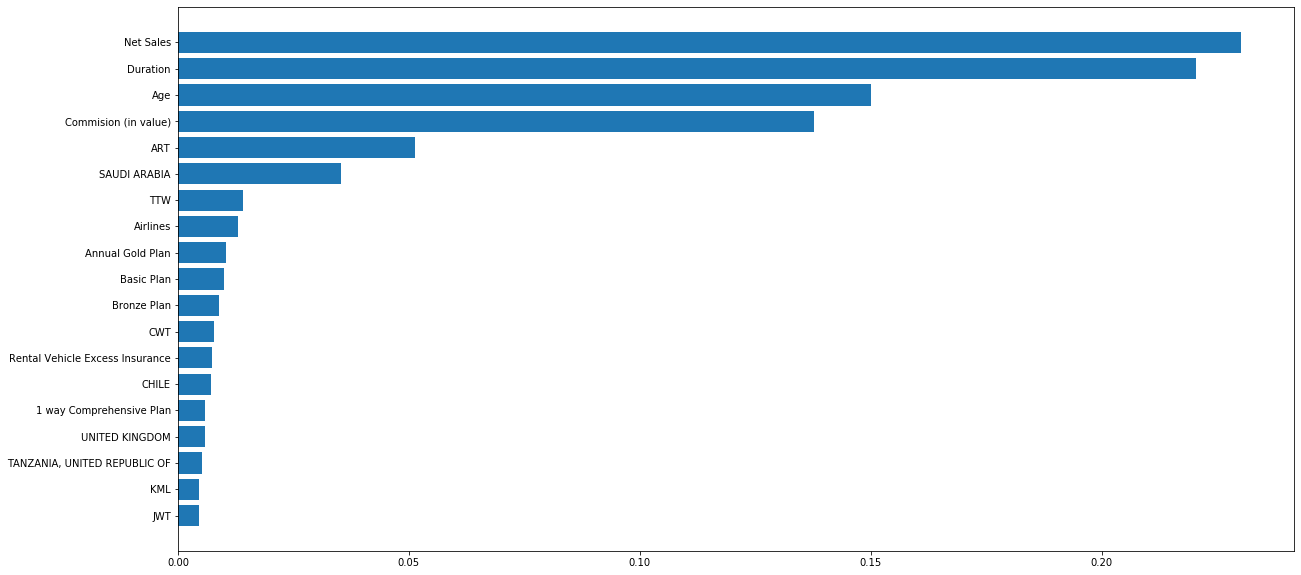

In [361]:
feature_imp = sorted(list(zip(newdata.columns,rfc.feature_importances_)), key= lambda x:x[1])[-1:-20:-1][-1::-1]
feature_imp = pd.DataFrame(feature_imp)
feature_imp.index = feature_imp.iloc[:,0]
feature_imp = feature_imp.drop(columns=[0])
plt.figure(figsize=(20,10))
plt.barh(feature_imp.index, feature_imp[1])
plt.show()

## Ramdom search with grid search

In [168]:
rfc=RandomForestClassifier()

In [169]:
param_grid = { 
    'n_estimators': [200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [170]:
custom_scorer = make_scorer(precision_score, greater_is_better=True,  pos_label=0)
cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring=custom_scorer)
cv_rfc.fit(X_train, y_train)
y_pred = cv_rfc.predict(X_test)

In [171]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

cr = classification_report(y_test, y_pred)
print()
print("Classification report")
print(cr)

accuracy = accuracy_score(y_test, y_pred)
print()
print("Accuracy score : ", round(accuracy*100,2), "%")

precision = precision_score(y_test, y_pred)
print()
print("Presion score : ", round(precision*100,2), "%")

Confusion Matrix
[[12846   288]
 [ 1891   668]]

Classification report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     13134
           1       0.70      0.26      0.38      2559

    accuracy                           0.86     15693
   macro avg       0.79      0.62      0.65     15693
weighted avg       0.84      0.86      0.83     15693


Accuracy score :  86.11 %

Presion score :  69.87 %


In [172]:
cv_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Binary Encoding and Prediction using Binary Encoder

In [7]:
be = ce.BinaryEncoder(cols=["Agency", "Agency Type", "Distribution Channel", "Product Name", "Duration", "Destination"])
data_binary = be.fit_transform(data)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_binary.drop(columns=["Claim"]), data_binary["Claim"], test_size=0.3, random_state=6)

In [12]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

cr = classification_report(y_test, y_pred)
print()
print("Classification report")
print(cr)

accuracy = accuracy_score(y_test, y_pred)
print()
print("Accuracy score : ", round(accuracy*100,2), "%")

precision = precision_score(y_test, y_pred)
print()
print("Presion score : ", round(precision*100,2), "%")

Confusion Matrix
[[12596   538]
 [  862  1697]]

Classification report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     13134
           1       0.76      0.66      0.71      2559

    accuracy                           0.91     15693
   macro avg       0.85      0.81      0.83     15693
weighted avg       0.91      0.91      0.91     15693


Accuracy score :  91.08 %


## Random forest with outlier handling and normalization

In [44]:
newdata = df.drop(columns="Agency")

### This method of handling outlier is giving 93.58% accuracy

In [45]:
newdata["Duration"] = newdata["Duration"].apply(lambda x: np.NaN if (x>1000) | (x<0) else x)
newdata.fillna(newdata["Duration"].mean(),inplace=True)

### This method of handling outlier is giving 93.76% accuracy

In [325]:
newdata = newdata[(newdata["Duration"]<1000) & (newdata["Duration"]>0)]

### One-Hot Encoding

In [8]:
newdata = newdata.join(pd.get_dummies(newdata["Agency Type"])).join(pd.get_dummies(newdata["Distribution Channel"])).join(pd.get_dummies(newdata["Product Name"])).join(pd.get_dummies(newdata["Destination"])).drop(columns=["Agency Type", "Distribution Channel", "Product Name", "Destination"])
newdata.shape

(52310, 131)

In [46]:
newdata = newdata.join(pd.get_dummies(newdata["Agency"])).join(pd.get_dummies(newdata["Agency Type"])).join(pd.get_dummies(newdata["Distribution Channel"])).join(pd.get_dummies(newdata["Product Name"])).join(pd.get_dummies(newdata["Destination"])).drop(columns=["Agency", "Agency Type", "Distribution Channel", "Product Name", "Destination"])
newdata.shape

(52310, 147)

### Normalization is able to achive 89.31% accuracy with rfc

In [343]:
newdata[["Duration", "Net Sales", "Commision (in value)", "Age"]] = pd.DataFrame(normalize(newdata.iloc[:,:4]))

### Scalling is able to achive 93.65% accuracy with rfc

In [19]:
newdata[["Duration", "Net Sales", "Commision (in value)", "Age"]] = pd.DataFrame(scale(newdata.iloc[:,:4]))
for col in ["Duration", "Net Sales", "Commision (in value)", "Age"]:
    newdata[col] = newdata[col].fillna(newdata[col].mean())

In [20]:
X_train, X_test, y_train, y_test = train_test_split(newdata.drop(columns=["Claim"]), newdata["Claim"], test_size=0.3, random_state=6)

In [21]:
rfc = RandomForestClassifier(n_estimators=750)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [22]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

cr = classification_report(y_test, y_pred)
print()
print("Classification report")
print(cr)

accuracy = accuracy_score(y_test, y_pred)
print()
print("Accuracy score : ", round(accuracy*100,2), "%")

precision = precision_score(y_test, y_pred)
print()
print("Presion score : ", round(precision*100,2), "%")

Confusion Matrix
[[12672   462]
 [  539  2020]]

Classification report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     13134
           1       0.81      0.79      0.80      2559

    accuracy                           0.94     15693
   macro avg       0.89      0.88      0.88     15693
weighted avg       0.94      0.94      0.94     15693


Accuracy score :  93.62 %

Presion score :  81.39 %


In [377]:
rfc.

1

In [18]:
X_train.shape

(36617, 146)

## Balancing Data set

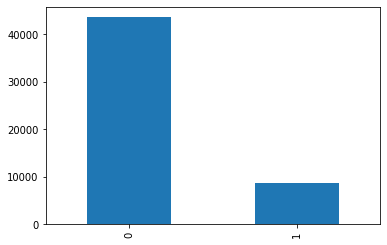

In [23]:
data["Claim"].value_counts().plot(kind="bar")

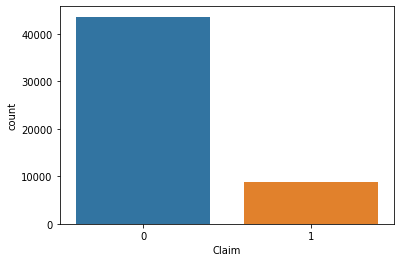

In [28]:
sns.countplot("Claim", data = data)

In [23]:
newdata = df
newdata["Agency Type"] = newdata["Agency Type"].replace({"Travel Agency" : 0, "Airlines" : 1})
newdata["Distribution Channel"] = newdata["Distribution Channel"].replace({"Online" : 0, "Offline" : 1})
newdata = newdata.join(pd.get_dummies(newdata["Agency"])).join(pd.get_dummies(newdata["Product Name"])).join(pd.get_dummies(newdata["Destination"])).drop(columns=["Agency", "Product Name", "Destination"])
data=newdata

In [24]:
X_sample, X_test, y_sample, y_test = train_test_split(data.drop(columns=["Claim"]), data["Claim"], test_size=0.3, random_state=6)

In [25]:
X_sample = X_sample[(X_sample["Duration"]<1000) & (X_sample["Duration"]>0)]
X_sample = X_sample[X_sample["Age"]<=90]
X_sample = X_sample[X_sample["Net Sales"]>0]
y_sample = y_sample.loc[X_sample.index]

In [26]:
ros = imblearn.over_sampling.SMOTE()
X_resampled, y_resampled = ros.fit_resample(X_sample, y_sample)

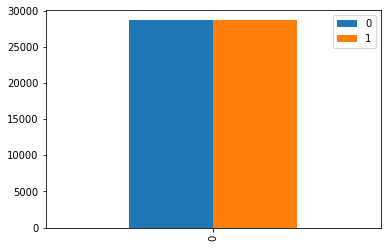

In [27]:
pd.DataFrame(data = Counter(y_resampled), index=[0]).plot(kind="bar")

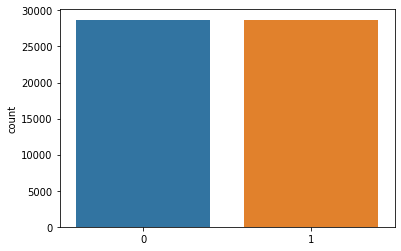

In [121]:
sns.countplot(y_resampled)

In [28]:
newdata = pd.DataFrame(X_resampled, columns=X_sample.columns)

In [29]:
y_resampled = pd.Series(y_resampled, name="Claim")

In [30]:
X_train, X_validate, y_train, y_validate = train_test_split(newdata, y_resampled, test_size=0.1, random_state=6)

In [38]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_validate_pred = rfc.predict(X_validate)

In [39]:
cm = confusion_matrix(y_validate, y_validate_pred)
print("Confusion Matrix")
print(cm)

cr = classification_report(y_validate, y_validate_pred)
print()
print("Classification report")
print(cr)

accuracy = accuracy_score(y_validate, y_validate_pred)
print()
print("Accuracy score : ", round(accuracy*100,2), "%")

precision = precision_score(y_validate, y_validate_pred)
print()
print("Presion score : ", round(precision*100,2), "%")

Confusion Matrix
[[2714  126]
 [  69 2833]]

Classification report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2840
           1       0.96      0.98      0.97      2902

    accuracy                           0.97      5742
   macro avg       0.97      0.97      0.97      5742
weighted avg       0.97      0.97      0.97      5742


Accuracy score :  96.6 %

Presion score :  95.74 %


In [40]:
y_test_pred = rfc.predict(X_test)

In [41]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

cr = classification_report(y_test, y_pred)
print()
print("Classification report")
print(cr)

accuracy = accuracy_score(y_test, y_pred)
print()
print("Accuracy score : ", round(accuracy*100,2), "%")

precision = precision_score(y_test, y_pred)
print()
print("Presion score : ", round(precision*100,2), "%")

Confusion Matrix
[[12672   462]
 [  539  2020]]

Classification report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     13134
           1       0.81      0.79      0.80      2559

    accuracy                           0.94     15693
   macro avg       0.89      0.88      0.88     15693
weighted avg       0.94      0.94      0.94     15693


Accuracy score :  93.62 %

Presion score :  81.39 %


## new way

(array([17289., 11570.,  6556.,  4031.,  2716.,  1891.,  1409.,   988.,
          580.,   492.]),
 array([ -2. ,  13.1,  28.2,  43.3,  58.4,  73.5,  88.6, 103.7, 118.8,
        133.9, 149. ]),
 <a list of 10 Patch objects>)

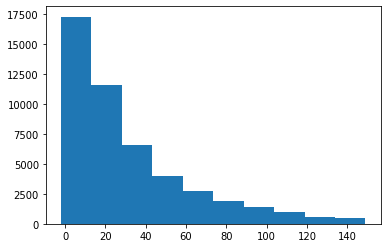

In [169]:
# plt.hist(df[(df["Age"]<70) & (df["Age"]>20)]["Age"])
plt.hist(df[df["Duration"]<150]["Duration"])
# plt.hist(df[(df["Net Sales"]>0) & (df["Net Sales"]<120)]["Net Sales"])
# plt.hist(df[df["Commision (in value)"]<120]["Commision (in value)"])

In [89]:
df.head()

,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,0,0,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,0,0,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,0,0,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,0,0,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,0,0,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [115]:
newdata = df.drop(columns=["Agency"])
# newdata = df
newdata["Agency Type"] = newdata["Agency Type"].replace({"Travel Agency" : 0, "Airlines" : 1})
newdata["Distribution Channel"] = newdata["Distribution Channel"].replace({"Online" : 0, "Offline" : 1})
newdata = newdata.join(pd.get_dummies(newdata["Product Name"])).join(pd.get_dummies(newdata["Destination"])).drop(columns=["Product Name", "Destination"])
# newdata = newdata.join(pd.get_dummies(newdata["Agency"])).join(pd.get_dummies(newdata["Product Name"])).join(pd.get_dummies(newdata["Destination"])).drop(columns=["Agency", "Product Name", "Destination"])
newdata.head()

,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Age,Claim,1 way Comprehensive Plan,2 way Comprehensive Plan,24 Protect,...,TURKMENISTAN,UKRAINE,UNITED ARAB EMIRATES,UNITED KINGDOM,UNITED STATES,UZBEKISTAN,VANUATU,VENEZUELA,VIET NAM,ZAMBIA
0,0,0,61,12.0,0.00,41,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,4,17.0,0.00,35,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,26,19.8,11.88,47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,15,27.0,0.00,48,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,15,37.0,0.00,36,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
min_age = newdata["Age"].quantile(0.05)
max_age = newdata["Age"].quantile(0.95)
min_duration = newdata["Duration"].quantile(0.05)
max_duration = newdata["Duration"].quantile(0.95)
min_netSales = newdata["Net Sales"].quantile(0.05)
max_netSales = newdata["Net Sales"].quantile(0.95)
min_commision = newdata["Commision (in value)"].quantile(0.05)
max_commision = newdata["Commision (in value)"].quantile(0.95)
mean_duration = newdata[(newdata["Duration"]>min_duration) & (newdata["Duration"]<max_duration)]["Duration"].mean()
mean_age = newdata[(newdata["Age"]>min_age) & (newdata["Age"]<max_age)]["Age"].mean()
mean_netSales = newdata[(newdata["Net Sales"]>min_netSales) & (newdata["Net Sales"]<max_netSales)]["Duration"].mean()
mean_commision = newdata[(newdata["Commision (in value)"]>min_commision) & (newdata["Commision (in value)"]<max_commision)]["Commision (in value)"].mean()

newdata["Duration"] = newdata["Duration"].apply(lambda x: mean_duration if (x<=min_duration) | (x>=max_duration) else x)
newdata["Age"] = newdata["Age"].apply(lambda x: mean_age if (x<=min_age) | (x>=max_age) else x)
newdata["Net Sales"] = newdata["Net Sales"].apply(lambda x: mean_netSales if (x<=min_netSales) | (x>=max_netSales) else x)
newdata["Commision (in value)"] = newdata["Commision (in value)"].apply(lambda x: mean_commision if (x<=min_commision) | (x>=max_commision) else x)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(newdata.drop(columns=["Claim"]), newdata["Claim"], test_size=0.3, random_state=6)

In [75]:
X_train = X_train[(X_train["Duration"]<1000) & (X_train["Duration"]>0)]
X_train = X_train[X_train["Age"]<=90]
X_train = X_train[X_train["Net Sales"]>0]
y_train = y_train.loc[X_train.index]

In [117]:
X_train = X_train[(X_train["Age"]<70) & (X_train["Age"]>20)]
X_train = X_train[X_train["Duration"]<150]
X_train = X_train[(X_train["Net Sales"]>0) & (X_train["Net Sales"]<120)]
X_train = X_train[X_train["Commision (in value)"]<120]
y_train = y_train.loc[X_train.index]

In [64]:
X_test["Duration"] = X_test["Duration"].apply(lambda x: X_train["Duration"].mean() if (x<=0) | (x>=1000) else x)
X_test["Age"] = X_test["Age"].apply(lambda x: X_train["Age"].mean() if (x>90) else x)
X_test["Net Sales"] = X_test["Net Sales"].apply(lambda x: X_train["Net Sales"].mean() if (x<0) else x)

In [161]:
X_train = X_train[(X_train["Duration"]>min_duration) & (X_train["Duration"]<max_duration)]
X_train = X_train[(X_train["Age"]>min_age) & (X_train["Age"]<max_age)]
X_train = X_train[(X_train["Net Sales"]>min_netSales) & (X_train["Net Sales"]<max_netSales)]
y_train = y_train.loc[X_train.index]

In [118]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [119]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

cr = classification_report(y_test, y_pred)
print()
print("Classification report")
print(cr)

accuracy = accuracy_score(y_test, y_pred)
print()
print("Accuracy score : ", round(accuracy*100,2), "%")

precision = precision_score(y_test, y_pred)
print()
print("Presion score : ", round(precision*100,2), "%")

Confusion Matrix
[[12777   357]
 [ 1122  1437]]

Classification report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     13134
           1       0.80      0.56      0.66      2559

    accuracy                           0.91     15693
   macro avg       0.86      0.77      0.80     15693
weighted avg       0.90      0.91      0.90     15693


Accuracy score :  90.58 %

Presion score :  80.1 %


## KNN

In [173]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [174]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

cr = classification_report(y_test, y_pred)
print()
print("Classification report")
print(cr)

accuracy = accuracy_score(y_test, y_pred)
print()
print("Accuracy score : ", round(accuracy*100,2), "%")

precision = precision_score(y_test, y_pred)
print()
print("Presion score : ", round(precision*100,2), "%")

Confusion Matrix
[[12176   958]
 [  816  1743]]

Classification report
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     13134
           1       0.65      0.68      0.66      2559

    accuracy                           0.89     15693
   macro avg       0.79      0.80      0.80     15693
weighted avg       0.89      0.89      0.89     15693


Accuracy score :  88.7 %

Presion score :  64.53 %


## SVM

In [175]:
clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [176]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

cr = classification_report(y_test, y_pred)
print()
print("Classification report")
print(cr)

accuracy = accuracy_score(y_test, y_pred)
print()
print("Accuracy score : ", round(accuracy*100,2), "%")

precision = precision_score(y_test, y_pred)
print()
print("Presion score : ", round(precision*100,2), "%")

Confusion Matrix
[[12753   381]
 [ 1980   579]]

Classification report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     13134
           1       0.60      0.23      0.33      2559

    accuracy                           0.85     15693
   macro avg       0.73      0.60      0.62     15693
weighted avg       0.82      0.85      0.82     15693


Accuracy score :  84.96 %

Presion score :  60.31 %


In [ ]:
feature_imp = sorted(list(zip(newdata.columns,rfc.feature_importances_)), key= lambda x:x[1])[-1:-20:-1][-1::-1]
feature_imp = pd.DataFrame(feature_imp)
feature_imp.index = feature_imp.iloc[:,0]
feature_imp = feature_imp.drop(columns=[0])
plt.figure(figsize=(20,10))
plt.barh(feature_imp.index, feature_imp[1])
plt.show()

# Exploring Test data

In [92]:
submission = pd.read_csv(r"C:\Users\eakhumb\Downloads\file\test.csv")

In [ ]:
data = submission
fig, ax = plt.subplots(4, 2, figsize=[20,15])
fig.subplots_adjust(hspace = .30)

ax[0][0].bar(list(data["Agency"].value_counts().index), data["Agency"].value_counts(), alpha = .50,edgecolor= 'black',color ='lightgreen')
ax[0][0].tick_params(axis = 'x', labelrotation=90)
ax[0][0].set_title("Agency Count")

ax[1][0].bar(list(data["Agency Type"].value_counts().index), data["Agency Type"].value_counts(), alpha = .50,edgecolor= 'black',color ='lightgreen')
ax[1][0].set_title("Agency Type Count")

ax[2][0].bar(list(data["Distribution Channel"].value_counts().index), data["Distribution Channel"].value_counts(), alpha = .50,edgecolor= 'black',color ='lightgreen')
ax[2][0].set_title("Distribution Channel Count")

ax[3][0].bar(list(data["Product Name"].value_counts().index), data["Product Name"].value_counts(), alpha = .50,edgecolor= 'black',color ='lightgreen')
ax[3][0].tick_params(axis = 'x', labelrotation=90)
ax[3][0].set_title("Product Name Count")

ax[0][1].hist(data["Duration"], bins=20, alpha = .50,edgecolor= 'black',color ='lightgreen')
ax[0][1].set_title("Duration")

ax[1][1].hist(data["Net Sales"], bins=20, alpha = .50,edgecolor= 'black',color ='lightgreen')
ax[1][1].set_title("Net Sales")

ax[2][1].hist(data[r"Commision (in value)"], bins=20, alpha = .50,edgecolor= 'black',color ='lightgreen')
ax[2][1].set_title(r"Commision (in value)")

ax[3][1].hist(data["Age"], bins=20, alpha = .50,edgecolor= 'black',color ='lightgreen')
ax[3][1].set_title("Age")

plt.show()

# Creating Submission file using best method

In [121]:
X_train = X_train[(X_train["Age"]<70) & (X_train["Age"]>20)]
X_train = X_train[X_train["Duration"]<150]
X_train = X_train[(X_train["Net Sales"]>0) & (X_train["Net Sales"]<120)]
X_train = X_train[X_train["Commision (in value)"]<120]
y_train = y_train.loc[X_train.index]

In [133]:
path = r"C:\Users\eakhumb\Downloads\file\train.csv"
submission = pd.read_csv(r"C:\Users\eakhumb\Downloads\file\test.csv")

df = pd.read_csv(path)
df = df.drop(columns=["ID"])

submission_id = submission["ID"]
submission.drop(columns=["ID"], inplace=True)

newdata = df
newdata["Agency Type"] = newdata["Agency Type"].replace({"Travel Agency" : 0, "Airlines" : 1})
newdata["Distribution Channel"] = newdata["Distribution Channel"].replace({"Online" : 0, "Offline" : 1})
newdata = newdata.join(pd.get_dummies(newdata["Agency"])).join(pd.get_dummies(newdata["Product Name"])).join(pd.get_dummies(newdata["Destination"])).drop(columns=["Agency", "Product Name", "Destination"])

rfc = RandomForestClassifier(n_estimators=750)
rfc.fit(newdata.drop(columns="Claim"), newdata["Claim"])

newdata = submission
newdata["Agency Type"] = newdata["Agency Type"].replace({"Travel Agency" : 0, "Airlines" : 1})
newdata["Distribution Channel"] = newdata["Distribution Channel"].replace({"Online" : 0, "Offline" : 1})
newdata = newdata.join(pd.get_dummies(newdata["Agency"])).join(pd.get_dummies(newdata["Product Name"])).join(pd.get_dummies(newdata["Destination"])).drop(columns=["Agency", "Product Name", "Destination"])

submission_pred = rfc.predict(newdata)
submission_final = pd.DataFrame({"ID" : submission_id, "Claim" : submission_pred})
submission_final.to_csv(r"C:\Users\eakhumb\Downloads\file\Submission.csv", index=False)